In [2]:
#biblioteca de calculo
import numpy as np

#biblioteca para machine learning scikit-learn
from sklearn.datasets import load_iris # carregar os dados da base iris
from sklearn.model_selection import train_test_split # funçao para dividir a base em treino e teste
from sklearn.preprocessing import OneHotEncoder #função para normalização

#funções diversas da bibliotecas keras
from tensorflow.keras.models import Sequential # objeto que cria rede neural
from tensorflow.keras.layers import Dense # objeto ue cria camadas
from tensorflow.keras.optimizers import Adam # otimizador da rede neural


In [3]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:7])
print('Example labels: ')
print(iris_data.target[48:115])

x = iris_data.data
y_= iris_data.target.reshape(-1, 1) # Convert data to a single column

# Normalização
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print(y[48:53])

# Dividir em Treino e Teste
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
Example labels: 
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [4]:
#inicia a construção da rede neural
model = Sequential()

#adicionando camadas
#na primeira camada, é necessário definir o input_shape ( que deve ser igual ao numero de colunas no X)

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc11'))
model.add(Dense(15, activation='relu', name='fc22'))
#normalmente quando é um problema de classificação, utilizamos ativação softmax na ultima camada
model.add(Dense(3, activation='softmax', name='output'))

# O método compile recebe o otimizador, função loss e a métrica
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc11 (Dense)                 (None, 10)                50        
_________________________________________________________________
fc22 (Dense)                 (None, 15)                165       
_________________________________________________________________
output (Dense)               (None, 3)                 48        
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#treina o modelo usando um certo numero de iterações (épocas)
history = model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)

Epoch 1/200
3/3 - 0s - loss: 0.0528 - accuracy: 0.9863 - val_loss: 0.0679 - val_accuracy: 0.9688
Epoch 2/200
3/3 - 0s - loss: 0.0532 - accuracy: 0.9726 - val_loss: 0.0670 - val_accuracy: 0.9688
Epoch 3/200
3/3 - 0s - loss: 0.0518 - accuracy: 0.9863 - val_loss: 0.0707 - val_accuracy: 0.9688
Epoch 4/200
3/3 - 0s - loss: 0.0533 - accuracy: 0.9863 - val_loss: 0.0784 - val_accuracy: 0.9688
Epoch 5/200
3/3 - 0s - loss: 0.0564 - accuracy: 0.9726 - val_loss: 0.0821 - val_accuracy: 0.9688
Epoch 6/200
3/3 - 0s - loss: 0.0560 - accuracy: 0.9726 - val_loss: 0.0792 - val_accuracy: 0.9688
Epoch 7/200
3/3 - 0s - loss: 0.0556 - accuracy: 0.9726 - val_loss: 0.0745 - val_accuracy: 0.9688
Epoch 8/200
3/3 - 0s - loss: 0.0533 - accuracy: 0.9726 - val_loss: 0.0743 - val_accuracy: 0.9688
Epoch 9/200
3/3 - 0s - loss: 0.0531 - accuracy: 0.9726 - val_loss: 0.0716 - val_accuracy: 0.9688
Epoch 10/200
3/3 - 0s - loss: 0.0541 - accuracy: 0.9863 - val_loss: 0.0663 - val_accuracy: 0.9688
Epoch 11/200
3/3 - 0s - loss:

In [14]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


2/2 [==============================] - 0s 7ms/step - loss: 0.0871 - accuracy: 0.9778
Final test set loss: 0.087070
Final test set accuracy: 0.977778


[Text(0.5, 15.000000000000028, 'Época')]

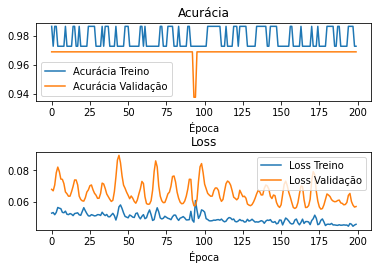

In [15]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
xv=history.history['val_accuracy']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [ ]:
# model.predict()

In [21]:

#train_y, test_y 
res=model.predict(test_x)
res2=res.astype(float)
np.set_printoptions(precision=8)
print(np.around(res2[:10],3))
print(np.around(res2[:10],0))
#print(res2[:10])
print(test_y[:10])


[[0.    0.005 0.995]
 [0.    0.316 0.684]
 [0.    0.994 0.006]
 [0.999 0.001 0.   ]
 [0.    0.003 0.997]
 [0.998 0.002 0.   ]
 [0.    0.008 0.992]
 [0.001 0.999 0.   ]
 [0.    0.001 0.999]
 [0.    0.003 0.997]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [36]:
from sklearn.metrics import confusion_matrix
test_pred=model.predict(test_x)
test_pred = np.around(test_pred,0)
print(type(test_pred), type(test_y))
test_pred = test_pred.astype(int)
test_y = test_y.astype(int)
confusion_matrix(test_y.argmax(axis=1), test_pred.argmax(axis=1))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]])

In [ ]:
#exemplo de rede neural com regressao

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
import io
import requests
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/silviostanzani/PosBigData/master/Auto2.csv"
s = requests.get(url).content
dataframe = read_csv(io.StringIO(s.decode('utf-8')))
print(dataframe)
print(dataframe.columns)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X_ = dataset[:,2:8]
y_ = dataset[:,1]
print(X)
print(y)

X = np.asarray(X_).astype(np.float32)
y = np.asarray(y_).astype(np.float32)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

      mpg  cylinders  displacement  ...  year  origin                       name
0    18.0          8         307.0  ...    70       1  chevrolet chevelle malibu
1    15.0          8         350.0  ...    70       1          buick skylark 320
2    18.0          8         318.0  ...    70       1         plymouth satellite
3    16.0          8         304.0  ...    70       1              amc rebel sst
4    17.0          8         302.0  ...    70       1                ford torino
..    ...        ...           ...  ...   ...     ...                        ...
392  27.0          4         140.0  ...    82       1            ford mustang gl
393  44.0          4          97.0  ...    82       2                  vw pickup
394  32.0          4         135.0  ...    82       1              dodge rampage
395  28.0          4         120.0  ...    82       1                ford ranger
396  31.0          4         119.0  ...    82       1                 chevy s-10

[397 rows x 9 columns]
Inde

In [ ]:
model = Sequential()

#model.add(Dense(20, input_dim=6, activation='relu'))
#model.add(Dense(1))
model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


In [ ]:
history=model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)


Epoch 1/200
10/10 - 0s - loss: 93.9336 - mse: 93.9336
Epoch 2/200
10/10 - 0s - loss: 27.3745 - mse: 27.3745
Epoch 3/200
10/10 - 0s - loss: 4.3642 - mse: 4.3642
Epoch 4/200
10/10 - 0s - loss: 4.4602 - mse: 4.4602
Epoch 5/200
10/10 - 0s - loss: 1.8018 - mse: 1.8018
Epoch 6/200
10/10 - 0s - loss: 0.8139 - mse: 0.8139
Epoch 7/200
10/10 - 0s - loss: 0.8581 - mse: 0.8581
Epoch 8/200
10/10 - 0s - loss: 0.7461 - mse: 0.7461
Epoch 9/200
10/10 - 0s - loss: 0.6802 - mse: 0.6802
Epoch 10/200
10/10 - 0s - loss: 0.6943 - mse: 0.6943
Epoch 11/200
10/10 - 0s - loss: 0.6679 - mse: 0.6679
Epoch 12/200
10/10 - 0s - loss: 0.6549 - mse: 0.6549
Epoch 13/200
10/10 - 0s - loss: 0.6534 - mse: 0.6534
Epoch 14/200
10/10 - 0s - loss: 0.6331 - mse: 0.6331
Epoch 15/200
10/10 - 0s - loss: 0.6136 - mse: 0.6136
Epoch 16/200
10/10 - 0s - loss: 0.6126 - mse: 0.6126
Epoch 17/200
10/10 - 0s - loss: 0.5954 - mse: 0.5954
Epoch 18/200
10/10 - 0s - loss: 0.6028 - mse: 0.6028
Epoch 19/200
10/10 - 0s - loss: 0.5661 - mse: 0.566

In [ ]:
results = model.evaluate(test_x, test_y)

print(results)

3/3 [==============================] - 0s 2ms/step - loss: 0.3092 - mse: 0.3092
[0.30918702483177185, 0.30918702483177185]


In [ ]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
xv=history.history['val_accuracy']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [ ]:
#train_y, test_y 
res=model.predict(test_x)
#res2=res.astype(float)
np.set_printoptions(precision=0)
#print(np.around(res2[:10],3))
print(res[:10])
print(test_y[:10])

[[8.]
 [4.]
 [5.]
 [4.]
 [5.]
 [5.]
 [9.]
 [6.]
 [9.]
 [4.]]
[8. 4. 4. 4. 6. 4. 8. 6. 8. 4.]


In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, res, squared=False)

0.12975901731140607